<a href="https://colab.research.google.com/github/Arkopradhan/BOSTON_HOUSE_PRICE_PREDICTION/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Summrazied Data


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional and categorical variables. These coulmns may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

Dimension 

In [ ]:
df.shape

(506, 14)

EDA

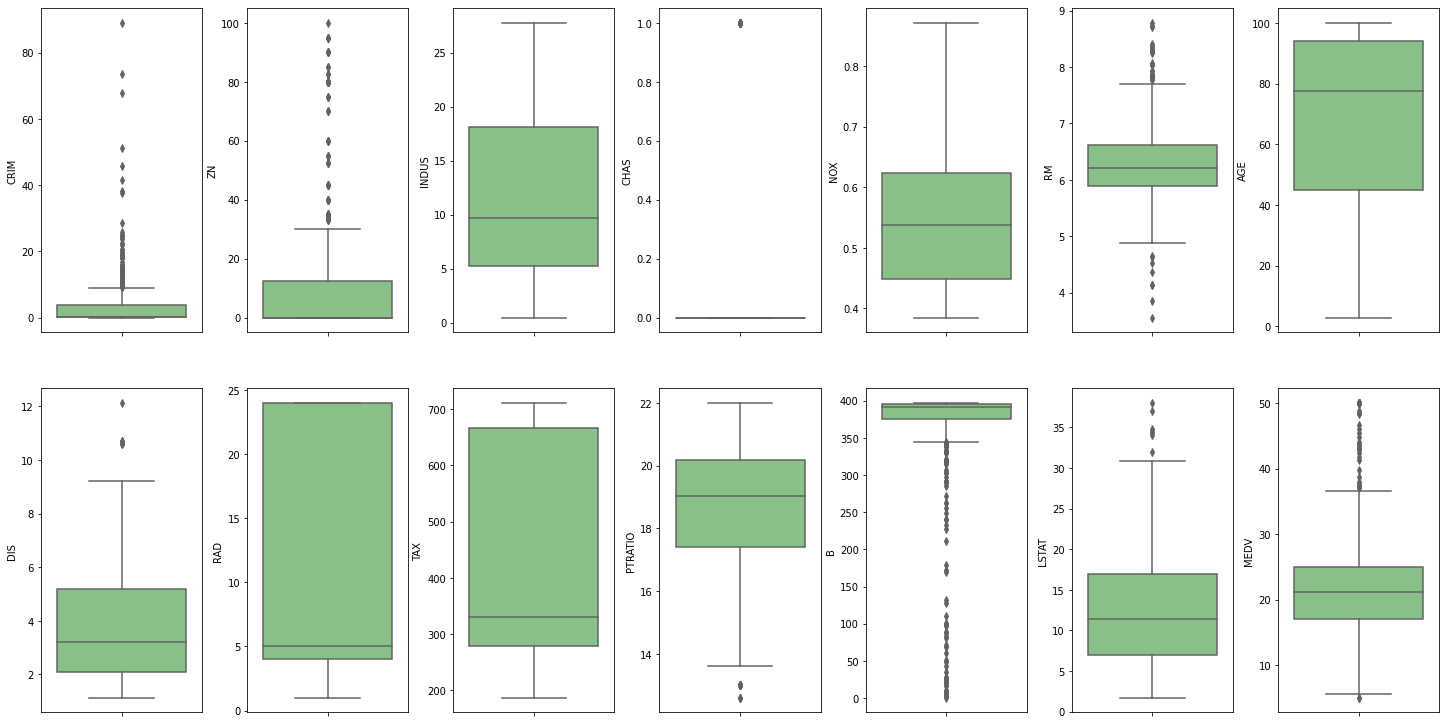

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index],palette="Accent")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Outliers percentage for each column

In [ ]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Remove MEDV outliers (MEDV = 50.0)

In [ ]:
df = df[~(df['MEDV'] >= 50.0)]

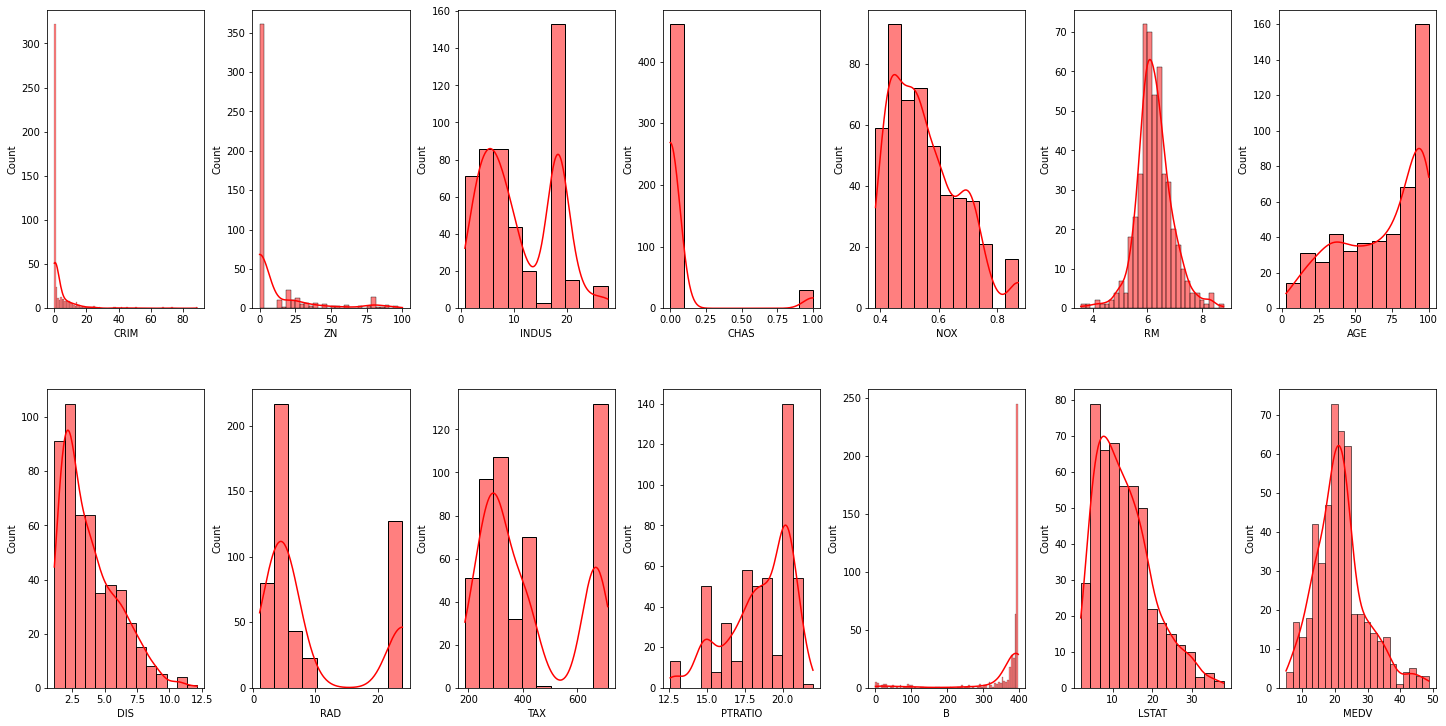

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax=axs[index],color='r',kde="True")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram shows that columns CRIM, ZN, B has highly skewed distributions. A MEDV looks to have a normal distribution (the predictions) and other colums seem to have normal or bimodel ditribution of data except CHAS (which is a discrete variable).

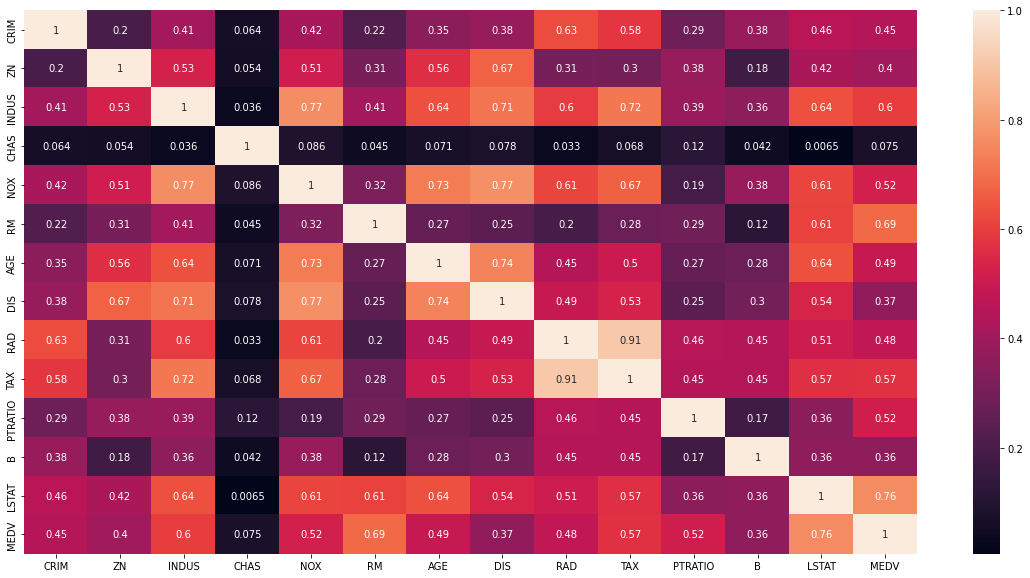

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

From correlation matrix, we can see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Plot these columns against MEDV.

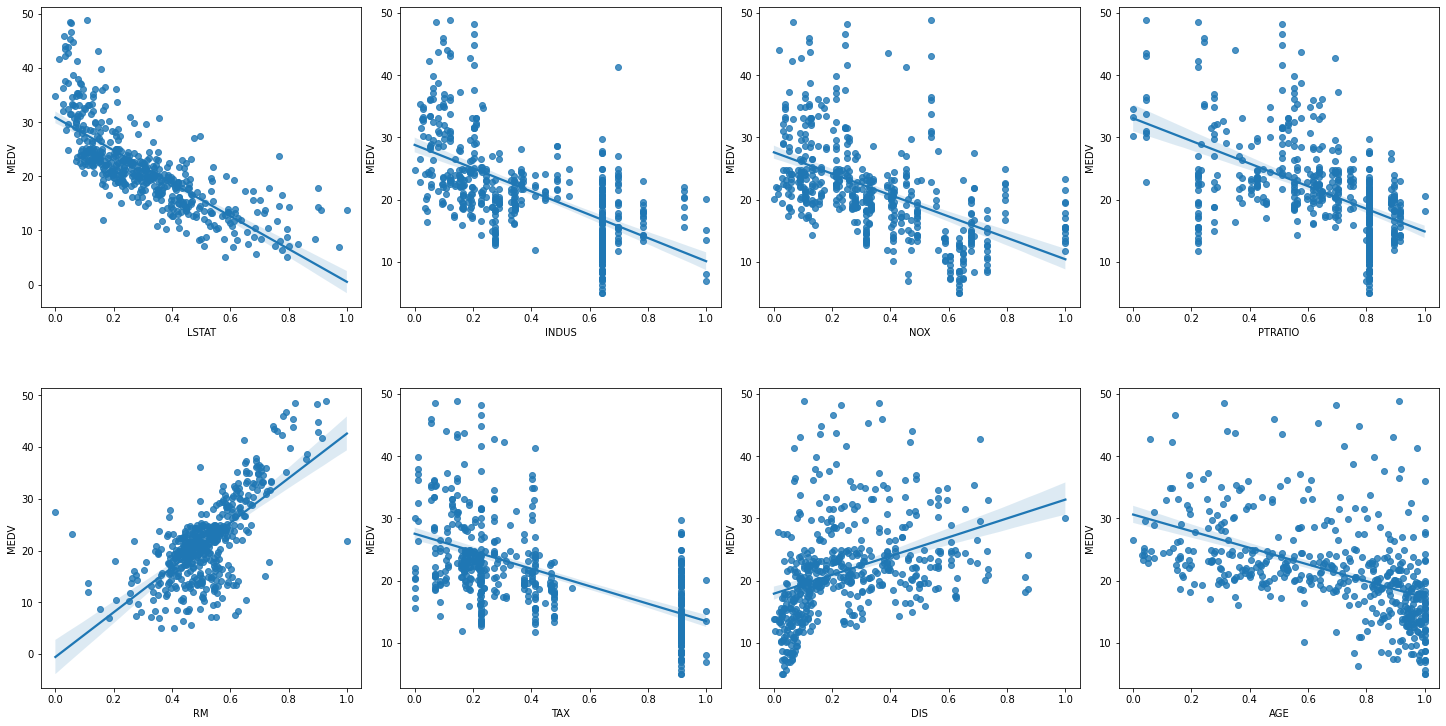

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Remove the skewness of the data trough log transformation.

In [ ]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])



LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

3.689502330804606

In [ ]:
regressor.coef_

array([-1.40752188,  0.01233198, -0.37922925, -0.40327582,  0.42492128,
       -0.28633764, -0.47858364, -0.01154037])

In [ ]:
# Predicting the Train set results
y_pred_train = regressor.predict(x_train)

In [ ]:
# Predicting the Test set results
y_pred_test = regressor.predict(x_test)

In [ ]:
#Train Performance
print("TRAIN PERFORMANCE:-")
print("MSE:",mean_squared_error(y_train, y_pred_train))
print("R2",r2_score(y_train, y_pred_train))


TRAIN PERFORMANCE:-
MSE: 0.031983962657499455
R2 0.7513537477695773


In [ ]:
#Test Performance
MSE =mean_squared_error(y_test, y_pred_test)
R2 =r2_score(y_test, y_pred_test)
print("MSE=",MSE)
print("R2=",R2)

MSE= 0.029718259863232482
R2= 0.7797880939271926


**SVR** using GridSearchCv

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

In [ ]:
modelsvr = SVR(kernel='rbf')

grids = GridSearchCV(modelsvr,param,cv=5)

grids.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale')},))

In [ ]:
# Predicting the Train set results
y_pred_train1 = grids.predict(x_train)

In [ ]:
# Predicting the Test set results
y_pred_test1 = grids.predict(x_test)

In [ ]:
#Train Performance
print("TRAIN PERFORMANCE:-")
print("MSE:",mean_squared_error(y_train, y_pred_train1))
print("R2 :",r2_score(y_train, y_pred_train1))


TRAIN PERFORMANCE:-
MSE: 0.012265647417597308
R2 : 0.9046457346694585


In [ ]:
#Test Performance
MSE =mean_squared_error(y_test, y_pred_test1)
R2 =r2_score(y_test, y_pred_test1)
print("MSE=",MSE)
print("R2=",R2)

MSE= 0.028885331847778285
R2= 0.7859600793243436


**Random ForestRegressor** with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
# Predicting the Train set results
y_pred_train2 =grid_search.predict(x_train)

In [ ]:
# Predicting the Test set results
y_pred_test2 = grid_search.predict(x_test)

In [ ]:
#Train Performance
MSE =mean_squared_error(y_train, y_pred_train2)
R2 =r2_score(y_train, y_pred_train2)
print("MSE=",MSE)
print("R2=",R2)

MSE= 0.008010767496073408
R2= 0.9377235605006905


In [ ]:
#Test Performance
MSE =mean_squared_error(y_test, y_pred_test2)
R2 =r2_score(y_test, y_pred_test2)
print("MSE=",MSE)
print("R2=",R2)

MSE= 0.011834515916327944
R2= 0.9123063961558587


**Gradient Boosting Regressor** with GRIDSEARCH **CV**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

estimator = GradientBoostingRegressor() 
classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid, n_jobs= -1)
classifier.fit(x,y)            

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [4],
                         'max_features': [1.0], 'min_samples_leaf': [3],
                         'n_estimators': [100, 500]})

In [ ]:
# Predicting the Train set results
y_pred_train3 = classifier.predict(x_train)

In [ ]:
# Predicting the Test set results
y_pred_test3 = classifier.predict(x_test)

In [ ]:
#Train Performance
MSE =mean_squared_error(y_train, y_pred_train3)
R2 =r2_score(y_train, y_pred_train3)
print("MSE=",MSE)
print("R2=",R2)

MSE= 0.005464493993444657
R2= 0.9575185236940276


In [ ]:
#Test Performance
MSE =mean_squared_error(y_test, y_pred_test3)
R2 =r2_score(y_test, y_pred_test3)
print("MSE=",MSE)
print("R2=",R2)

MSE= 0.006185221213723357
R2= 0.9541675939565651


**DecisionTreeRegressor** withGRID SEARCH CV

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
reg_decision_model=DecisionTreeRegressor()           
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3) 
tuning_model.fit(x,y)          

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.122 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.298 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.046 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.216 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.298 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, spl

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fract

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Predicting the Train set results
y_pred_train4 = tuning_model.predict(x_train)

In [ ]:
# Predicting the Test set results
y_pred_test4 = tuning_model.predict(x_test)

In [ ]:
#Train Performance
MSE =mean_squared_error(y_train, y_pred_train3)
R2 =r2_score(y_train, y_pred_train3)
print("MSE=",MSE)
print("R2=",R2)

MSE= 0.005464493993444657
R2= 0.9575185236940276


In [ ]:
#Test Performance
MSE =mean_squared_error(y_test, y_pred_test3)
R2 =r2_score(y_test, y_pred_test3)
print("MSE=",MSE)
print("R2=",R2)

MSE= 0.006185221213723357
R2= 0.9541675939565651


In [ ]:
from sklearn.tree import plot_tree

In [ ]:
reg_decision_model.fit(x,y)

DecisionTreeRegressor()

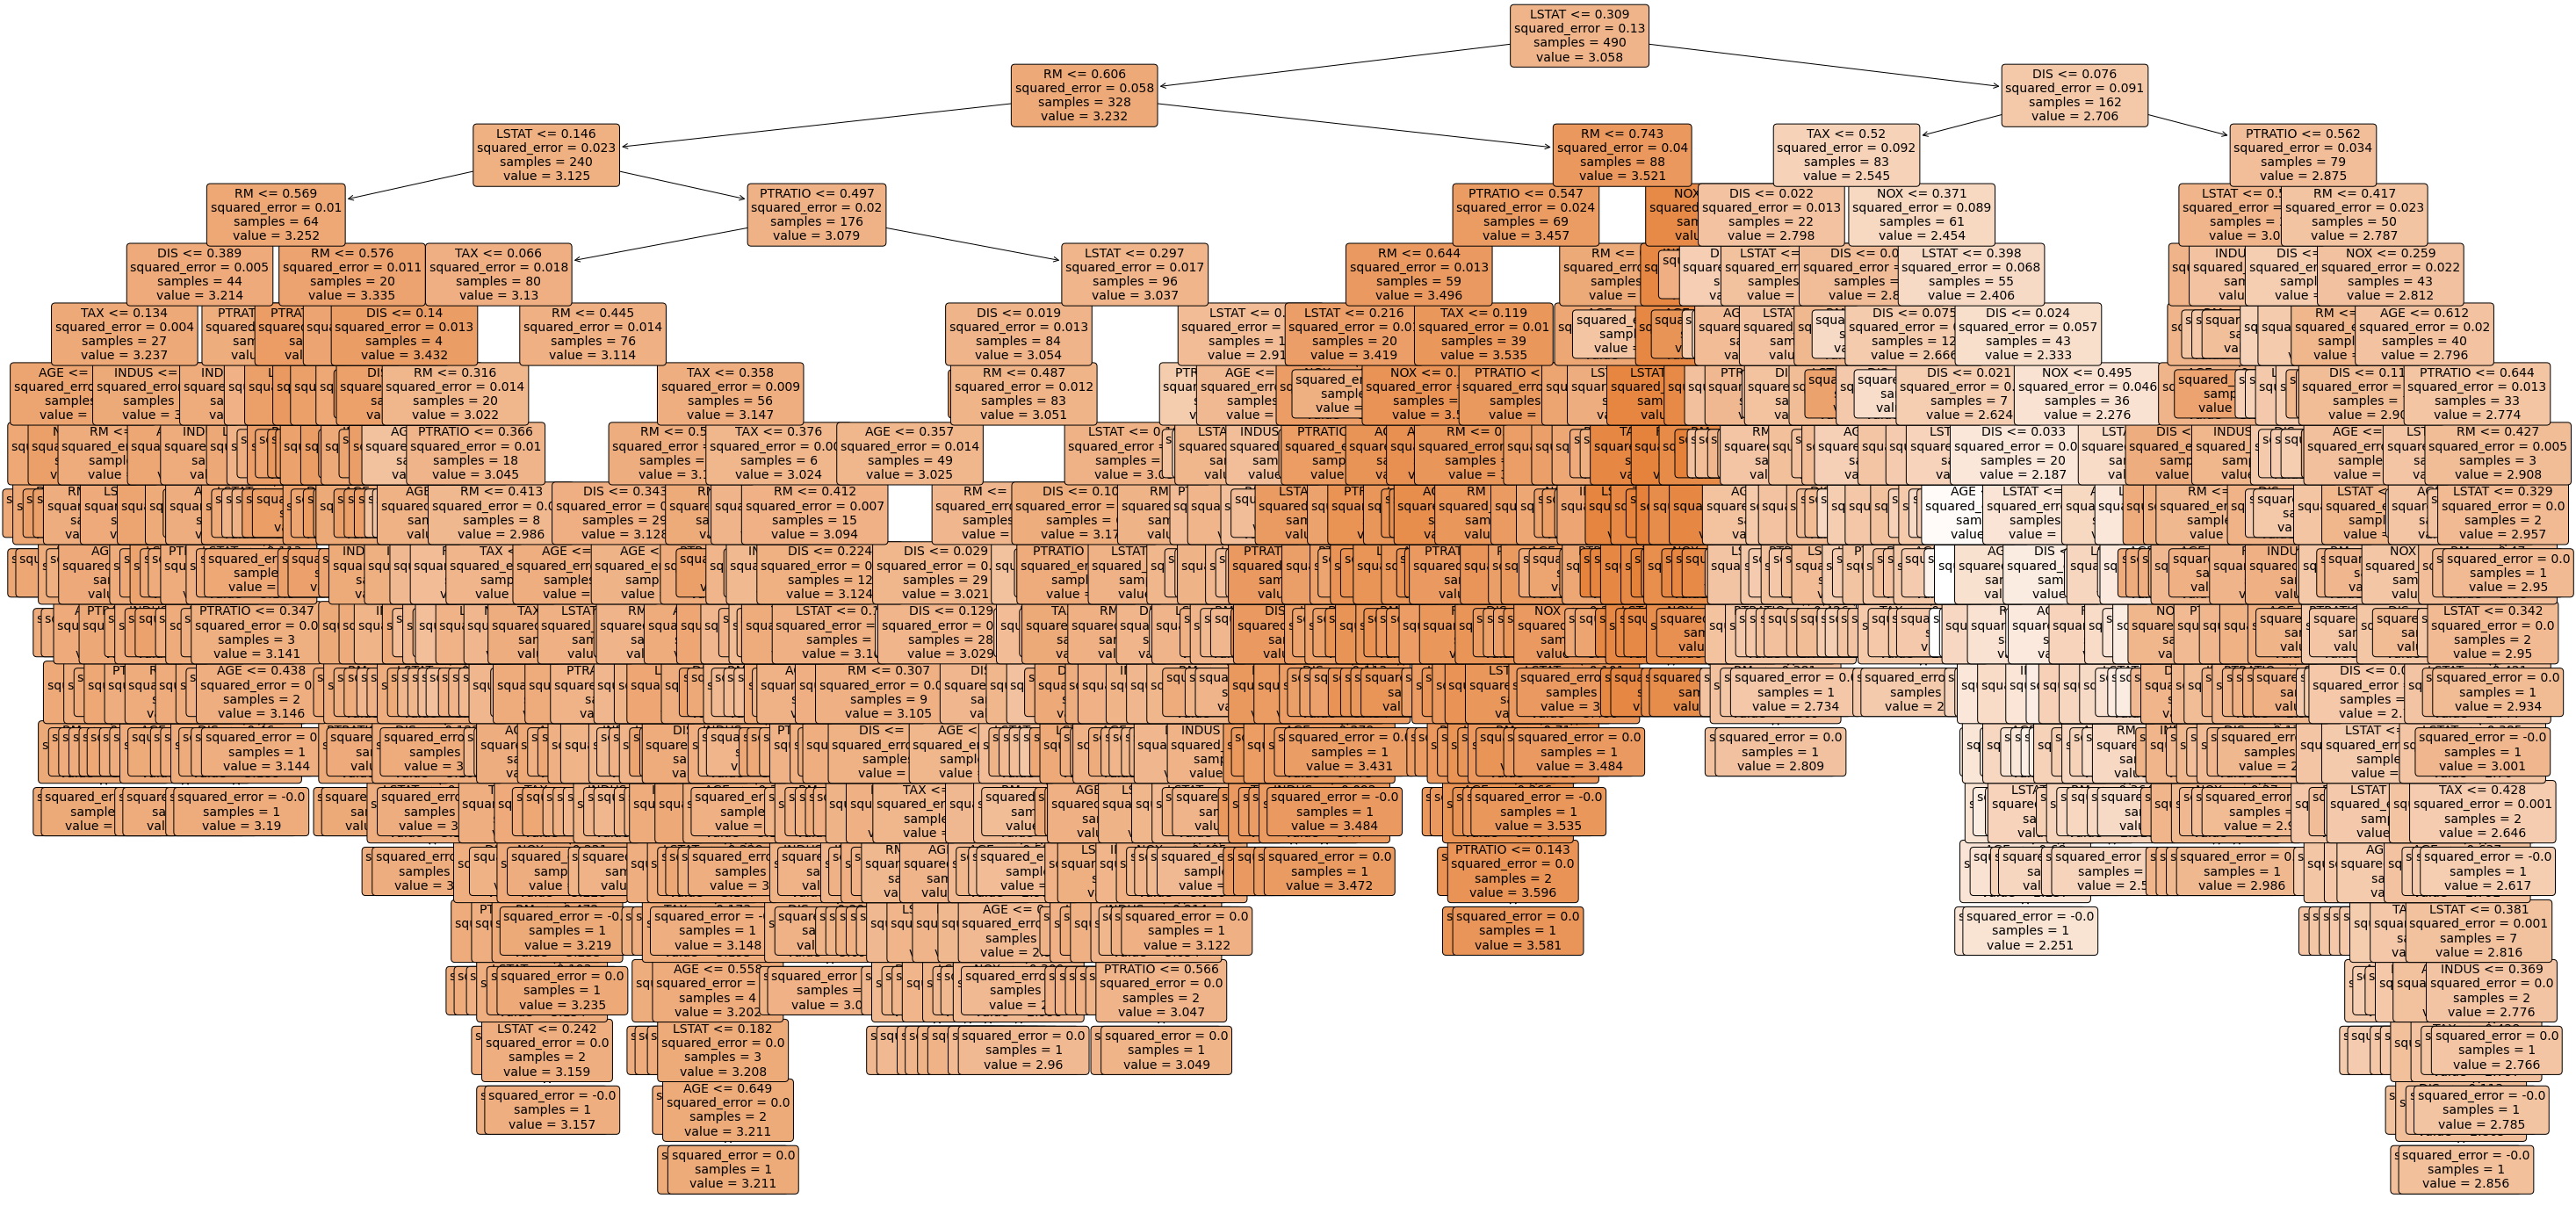

In [ ]:
plt.figure(figsize=(50,25))
a = plot_tree(reg_decision_model, 
              feature_names=x.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [ ]:
!pip install joblib

In [ ]:
 import joblib

In [ ]:
joblib.dump(tuning_model,'model_house')

['model_house']

In [ ]:
from google.colab import files
files.download('model_house')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tuning_model.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=9,max_features='log2',max_leaf_nodes=60,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')
tuned_hyper_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='log2', max_leaf_nodes=60,
                      min_weight_fraction_leaf=0.1)

In [ ]:
joblib.dump(tuned_hyper_model,'modeled_house')

['modeled_house']

In [ ]:
from google.colab import files
files.download('modeled_house')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>